In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler 
from collections import Counter
from sklearn.utils import resample
import re
import nltk 
from nltk.stem.porter import *
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')
import time
import timeit
from sklearn import preprocessing
!pip install --upgrade gensim
from gensim.models import Word2Vec
import gensim
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Input, Embedding,Activation
from keras.layers import Dense, SimpleRNN, Flatten
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.models import Model
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import  accuracy_score 

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Yousef\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Yousef\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Yousef\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
fakeD = pd.read_csv("fake_football.csv")
realD = pd.read_csv("real_football.csv")
print(fakeD.head())
print(realD.head())

                                               tweet
0  the tongue of his condition, now i saw things ...
1  by god the great, after i saw the derby of wyd...
2  believe in god, this zamalek fans are as good ...
3  the coach appeared in the media and told the t...
4  asno smito\nwhoever knows her tells me a massa...
                                               tweet
0  sun downs technical director: al-ahly respecte...
1  shawky gharib after the tie with enppi: our go...
2  egyptian sports news today, wednesday 1/25/202...
3  the main referees committee of the egyptian fo...
4  haji bari, the striker of the future team, is ...


In [3]:
realD["type"] = 0
fakeD["type"] = 1

In [4]:
tweets = pd.concat([fakeD, realD])
print(tweets.head())
print(tweets.tail())
print("--------------------")
print(tweets.info())

                                               tweet  type
0  the tongue of his condition, now i saw things ...     1
1  by god the great, after i saw the derby of wyd...     1
2  believe in god, this zamalek fans are as good ...     1
3  the coach appeared in the media and told the t...     1
4  asno smito\nwhoever knows her tells me a massa...     1
                                                   tweet  type
21864  shawky gharib: we excluded 4 players from the ...     0
21865  dina musharraf resumes her career in the singa...     0
21866  indeed, al-ahly ended its agreement with ricar...     0
21867  hazem imam, the captain of zamalek, decided to...     0
21868  walid al-attar, executive director of the egyp...     0
--------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 41868 entries, 0 to 21868
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweet   41851 non-null  object
 1   type    41868 non-null  in

In [5]:
tweets.isnull().sum()

tweet    17
type      0
dtype: int64

In [6]:
tweets.dropna(inplace = True)
tweets = tweets.sample(frac = 1).reset_index(drop = True)
print(tweets.head())
print(tweets.isnull().sum())

                                               tweet  type
0  the al-ahly and real madrid match can be watch...     0
1  ferreira, the coach of zamalek, faced the smou...     0
2                     may god grant us victory today     0
3   _ ukraine\nimagine the coach wouldn't record ...     1
4  haha ahmed al-sharif says to khaled al-ghandou...     1
tweet    0
type     0
dtype: int64


<AxesSubplot:title={'center':'Label'}, ylabel='Frequency'>

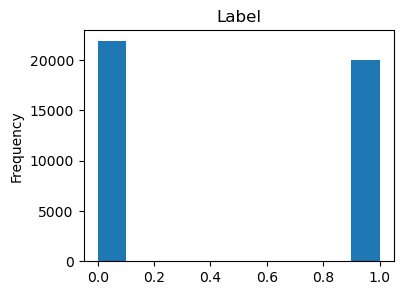

In [7]:
tweets["type"].plot(kind = "hist",title = "Label",figsize = (4,3))

In [8]:
tweets.type.value_counts()

0    21863
1    19988
Name: type, dtype: int64

In [9]:
def tokenization(text):
    tokens = re.findall('[\w]+',text)
    return tokens


wordnet_lemmatizer = WordNetLemmatizer()
def lemmatizer(text):
  lemm_text = [wordnet_lemmatizer.lemmatize(word) for word in text if len(text) > 1]
  return lemm_text


stopwords = nltk.corpus.stopwords.words('english')
stopwords[0:15]
def remove_stopwords(text):
    output= [i for i in text if i not in stopwords]
    return output


In [10]:
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
wordnet_lemmatizer = WordNetLemmatizer()
stopwords = set(stopwords.words('english'))
def clean_n_lemmatize(text):
    text_nopunct = ''.join([character for character in text.lower() if character not in string.punctuation])
    tokens = tokenization(text_nopunct)
    tokens_no_stop = remove_stopwords(tokens)
    lemmatized_tokens = lemmatizer(tokens_no_stop)
    return lemmatized_tokens

In [11]:
tweets['tokens'] = tweets['tweet'].apply(clean_n_lemmatize)
tweets.head()


,tweet,type,tokens
0,the al-ahly and real madrid match can be watch...,0,"[alahly, real, madrid, match, watched, ontime,..."
1,"ferreira, the coach of zamalek, faced the smou...",0,"[ferreira, coach, zamalek, faced, smouha, team..."
2,may god grant us victory today,0,"[may, god, grant, u, victory, today]"
3,_ ukraine\nimagine the coach wouldn't record ...,1,"[ukraine, imagine, coach, wouldnt, record, san..."
4,haha ahmed al-sharif says to khaled al-ghandou...,1,"[haha, ahmed, alsharif, say, khaled, alghandou..."


In [12]:
tweets['rejoined_string'] = tweets.tokens.apply(lambda tokens: ' '.join(tokens))
tweets.head()

,tweet,type,tokens,rejoined_string
0,the al-ahly and real madrid match can be watch...,0,"[alahly, real, madrid, match, watched, ontime,...",alahly real madrid match watched ontime sport ...
1,"ferreira, the coach of zamalek, faced the smou...",0,"[ferreira, coach, zamalek, faced, smouha, team...",ferreira coach zamalek faced smouha team twice...
2,may god grant us victory today,0,"[may, god, grant, u, victory, today]",may god grant u victory today
3,_ ukraine\nimagine the coach wouldn't record ...,1,"[ukraine, imagine, coach, wouldnt, record, san...",ukraine imagine coach wouldnt record sancho re...
4,haha ahmed al-sharif says to khaled al-ghandou...,1,"[haha, ahmed, alsharif, say, khaled, alghandou...",haha ahmed alsharif say khaled alghandour fan ...


In [13]:
X_train, X_test, y_train, y_test = train_test_split(tweets.drop('type', axis = 1), tweets['type'],
                                                    test_size=0.1, random_state=73, stratify = tweets['type'])

In [14]:
tfidf = TfidfVectorizer(analyzer = clean_n_lemmatize)
vectorized_weights_train = tfidf.fit_transform(X_train['tweet'])
vectorized_weights_test = tfidf.transform(X_test['tweet'])

In [15]:
vectorized_sparse_df = pd.DataFrame(vectorized_weights_train.toarray(), columns = tfidf.get_feature_names_out())
vectorized_sparse_df.head(10)

,0,00,01,012,01313131313,014,018,02,020,021,...,zul,zulfi,zuma,zuraida,zuri,zurich,zuwara,zvizif,zwain,zwan
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
print(tfidf.get_feature_names_out()[735:875])

['5352' '53rd' '54' '5423' '545' '54th' '55' '550' '555'
 '55555555555555555555555' '55kg' '55th' '56' '560' '5683768' '56th' '57'
 '570' '57409195th' '575000' '5797' '57th' '58' '582' '58th' '59' '59th'
 '5agency' '5all' '5another' '5day' '5m' '5th' '5year' '6' '60' '600'
 '6000' '60000' '600000' '60meter' '60th' '61' '612023' '6122022' '614'
 '615' '617' '61d' '61st' '62' '622023' '626' '626636' '62nd' '63' '630'
 '632023' '63rd' '64' '64th' '65' '650' '65000' '650000' '653' '6537843'
 '6558' '65th' '65yearold' '66' '662' '6667' '66th' '67' '6767' '6771'
 '68' '683' '685000' '6864' '68th' '69' '6955' '6965' '6970' '69th'
 '6alahly' '6center' '6d' '6dont' '6m' '6month' '6th' '6we' '6x6' '6yard'
 '6year' '7' '70' '700' '70000' '700000' '70000000' '7057' '70th' '71'
 '710' '712022' '712023' '7122022' '719' '72' '720' '722' '722023'
 '72hour' '72nd' '73' '730' '732023' '7398' '73rd'
 '73transferforthemustaqbal' '74' '7459' '7465' '748' '74th' '75' '750'
 '75000' '7500000' '7562' '75th' '

In [17]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(vectorized_weights_train, y_train)

MultinomialNB()

CLassification Report :

              precision    recall  f1-score   support

        Real       0.94      0.94      0.94      2187
        Fake       0.93      0.94      0.94      1999

    accuracy                           0.94      4186
   macro avg       0.94      0.94      0.94      4186
weighted avg       0.94      0.94      0.94      4186

Confusion Matrix :

[[2056  131]
 [ 127 1872]]


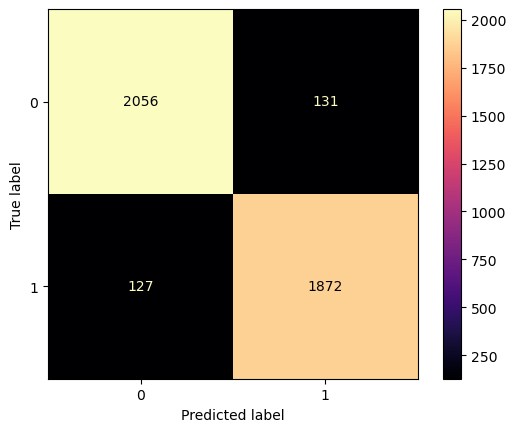

In [55]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, accuracy_score
y_pred = nb.predict(vectorized_weights_test)

print('CLassification Report :\n')
print(classification_report(y_test, y_pred, target_names = ['Real', 'Fake']))

print('Confusion Matrix :\n')
print(confusion_matrix(y_test, y_pred))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, labels = nb.classes_, cmap = 'magma')

CLassification Report :

              precision    recall  f1-score   support

        Real       0.95      0.93      0.94      2187
        Fake       0.92      0.95      0.94      1999

    accuracy                           0.94      4186
   macro avg       0.94      0.94      0.94      4186
weighted avg       0.94      0.94      0.94      4186

Confusion Matrix :

[[2033  154]
 [ 104 1895]]


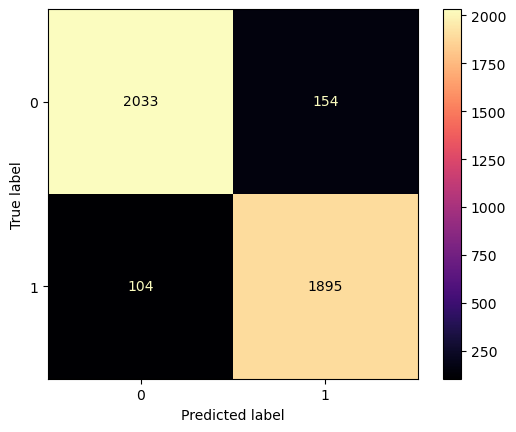

In [19]:
cv = CountVectorizer(analyzer = clean_n_lemmatize)
vectorized_sparse_matrix_train = cv.fit_transform(X_train['tweet'])
vectorized_sparse_matrix_test = cv.transform(X_test['tweet'])

nb2 = MultinomialNB()
nb2.fit(vectorized_sparse_matrix_train, y_train)

y_pred2 = nb2.predict(vectorized_sparse_matrix_test)

print('CLassification Report :\n')
print(classification_report(y_test, y_pred2, target_names = ['Real', 'Fake']))

print('Confusion Matrix :\n')
print(confusion_matrix(y_test, y_pred2))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred2, labels = nb2.classes_, cmap = 'magma')

(37665, 627110)
CLassification Report :

              precision    recall  f1-score   support

        Real       0.89      0.95      0.92      2187
        Fake       0.95      0.87      0.90      1999

    accuracy                           0.91      4186
   macro avg       0.92      0.91      0.91      4186
weighted avg       0.92      0.91      0.91      4186

Confusion Matrix :

[[2088   99]
 [ 266 1733]]


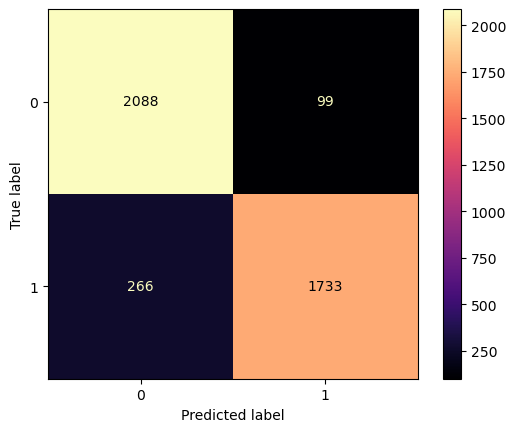

In [20]:
cv_ngrams = CountVectorizer(ngram_range = (2, 3))


vectorized_word_combo_train = cv_ngrams.fit_transform(X_train['rejoined_string'])
vectorized_word_combo_test = cv_ngrams.transform(X_test['rejoined_string'])

print(vectorized_word_combo_train.shape)

nb3 = MultinomialNB()
nb3.fit(vectorized_word_combo_train, y_train)

y_pred3 = nb3.predict(vectorized_word_combo_test)

print('CLassification Report :\n')
print(classification_report(y_test, y_pred3, target_names = ['Real', 'Fake']))

print('Confusion Matrix :\n')
print(confusion_matrix(y_test, y_pred3))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred3, labels = nb3.classes_, cmap = 'magma')

In [21]:
print('\nAccuracy using Multinomial Naive Bayes on\n')
print('Data Vectorized by TF-IDF Vectorizer : {}%'.format(100 * accuracy_score(y_test, y_pred)))
print('Data Vectorized by Count Vectorizer : {}%'.format(100 * accuracy_score(y_test, y_pred2)))
print('Data Vectorized by N-grams Vectorizer : {}%'.format(100 * accuracy_score(y_test, y_pred3)))


Accuracy using Multinomial Naive Bayes on

Data Vectorized by TF-IDF Vectorizer : 93.83659818442428%
Data Vectorized by Count Vectorizer : 93.83659818442428%
Data Vectorized by N-grams Vectorizer : 91.28045867176301%


In [46]:
news = str("salamat found the player and did not kick")+str(" ")+str("from cameroon - learn about the most prominent")
testing_news = {"text": [news]}
new_def_test = pd.DataFrame(testing_news)
new_xv_test = new_def_test["text"]
text_clean = new_xv_test.apply(clean_n_lemmatize)
new_x_test = new_def_test["text"]
vect = tfidf.transform(new_x_test)


<1x25595 sparse matrix of type '<class 'numpy.float64'>'
	with 7 stored elements in Compressed Sparse Row format>

In [69]:
import pickle
import joblib
filename = 'cleaning.pkl'
pd.to_pickle(clean_n_lemmatize,filename)

filename = 'vectorizer.pkl'
pd.to_pickle(tfidf,filename)

filename = 'multimodel.pkl'
pd.to_pickle(nb,filename)

In [63]:
with open('cvvector.pkl', 'wb') as file:
    pickle.dump(cv, file)
    
with open('model2.pkl', 'wb') as file:
    pickle.dump(y_pred2, file)

In [22]:
import pickle
with open('cleaning.pkl', 'wb') as file:
    pickle.dump(clean_n_lemmatize, file)

with open('vectorizer.pkl', 'wb') as file:
    pickle.dump(tfidf, file)

with open('multimodel.pkl', 'wb') as file:
    pickle.dump(y_pred, file)


In [70]:
with open('cleaning.pkl', 'rb') as f:
        cl = pickle.load(f)

with open('vectorizer.pkl', 'rb') as f:
        vectoriz = pickle.load(f)

with open('multimodel.pkl', 'rb') as f:
    nbbbbb = pickle.load(f)  

In [71]:
import joblib
news = str("salamat found the player and did not kick")
testing_news = {"text": [news]}
new_def_test = pd.DataFrame(testing_news)
new_xv_test = new_def_test["text"]
text_clean = new_xv_test.apply(cl)
new_x_test = new_def_test["text"]
vectorization = vectoriz.transform(new_x_test)
prediction = nbbbbb.predict(vectorization)
prediction

array([1], dtype=int64)